# **Representing the molecular structures mathematically**

This scripts uses the data preprocessed and resulted from the notebook named "Preprocessing" (path:FlavorMiner/Scripts
/).

The purpose of this script is to explore the data and generate three different mathematical of the gathred molecular structures: RDKit Molecular Descriptors, Extended Connectivity Fingerprint, and Molecular Graph. It also includes the feature selection step and the data spliting of the train and test set. The distribution of positive and negative data points was checked to guarantee a similar composition.


In [ ]:
!python --version

Python 3.10.12


WARNING. This script was developed with the python version Python 3.10.12. Be aware of this fact at the moment of using the code here displayed.

# 1. Importing the raw data from the GitHub repository

The raw data is stored as an Excel file in a publicly accessible GitHub repository. The name of the file is "labeled_data" (path:FlavorMiner
/Data). You can automatically retrieve the data without the need to download any files by using the pandas library and the respective GitHub raw link.

In [1]:
import pandas as pd

'''URL of the Excel file on GitHub'''

file_url = 'https://github.com/FabioHerrera97/FlavorMiner/raw/main/Data/LabelDataBase.xlsx'

''' Read the Excel file'''

data = pd.read_excel(file_url)

''' Print the contents of the DataFrame'''

data.head()

,Compound Name,pubChem ID,flavor profile,Isomeric Smiles,Source,Labels,Bitter,Floral,Fruity,Off_flavor,Nutty,Sour,Sweet,Unclassified
0,1-Aminopropan-2-ol,4,fishy,CC(CN)O,flavorDB,Off_flavor,0,0,0,1,0,0,0,0
1,2-Deoxyhexopyranose,40,sweet,C1C(C(C(OC1O)CO)O)O,flavorDB,Sweet,0,0,0,0,0,0,1,0
2,3-Methyl-2-oxovaleric acid,47,fruit,CCC(C)C(=O)C(=O)O,flavorDB,Fruity,0,0,1,0,0,0,0,0
3,3-Methyl-2-oxobutanoic acid,49,fruity,CC(C)C(=O)C(=O)O,flavorDB,Fruity,0,0,1,0,0,0,0,0
4,2-ketoglutaric acid,51,odorless,C(CC(=O)O)C(=O)C(=O)O,flavorDB,Unclassified,0,0,0,0,0,0,0,1


# 2. Exploring the distribution of positive and negative data

This section contains a general of exploration of the database used in this study. As the idea is to train different independent classifiers for each target flavor, the first step consisted of getting an idea of the distribution of positives (molecules with the respective flavor notes) and negatives (molecules without he respective flavor notes)

' To store the image in high resolution uncomment the code below'

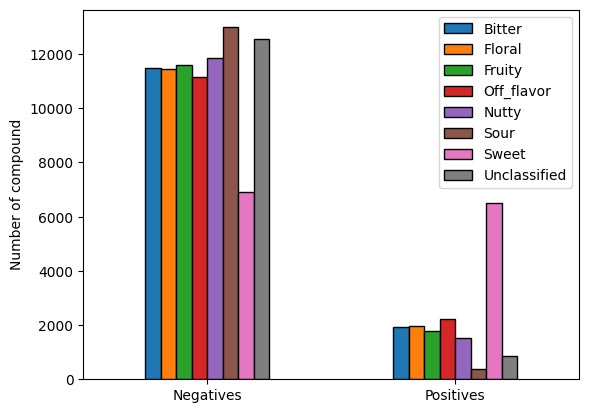

In [ ]:
import matplotlib.pyplot as plt

''' Create a new data frame only with the binary columns corresponding to the labels'''

data_to_plot = data.iloc[:,-8:]

''' Apply the value count function
Plot the counts for both negatives and positives data for each label'''

ax = data_to_plot.apply(pd.value_counts).plot(kind='bar', edgecolor = 'black')
ax.set_ylabel("Number of compound")
x_labels = ['Negatives', 'Positives']
ax.set_xticklabels(x_labels, rotation=0)

''' To store the image in high resolution uncomment the code below'''

#plt.savefig('Figure 1.jpeg', format='jpeg', dpi=2000)

This figure reflects the main challenge of the data: class imbalance. The positive data represents on average around 15% of the total registers for the different classes.

# 3. Generating the molecular descriptors with RDKit

RDKit is a python package to work with chemical data. In this step we are using RDKit to calculate 200 molecular descriptors using the isomeric smiles of each molecule.

RDKit is not a default package in google colab. For this reason it must be installed manually using the `!pip install` command. The version installed was rdkit-pypi-2022.9.5.

**Notice that the installation of not default packages in google colab as well as the configuration of the package itself can change overtime. In case of any error recurre to the respective documentation** ([https://www.rdkit.org/docs/index.html](https://www.rdkit.org/docs/index.html))

In [ ]:
!pip install rdkit-pypi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 43.3 MB/s eta 0:00:00


WARNING: Before calculating the molecular descriptors, it must be ensured that the isomeric smiles are correct. Compounds with ionic bounds coud be problematic and too large molecules can generate error at the moment of running this part.

In [ ]:
''' Import the RDKit libraries for molecular descriptor calculation'''

from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit import Chem

''' Create a fucntion that extract all the RDKit molecular descriptors'''

def RDkit_descriptors(smiles):
    mols = [Chem.MolFromSmiles(i) for i in smiles]
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    desc_names = calc.GetDescriptorNames()

    Mol_descriptors =[]

    for mol in mols:
        descriptors = calc.CalcDescriptors(mol)
        Mol_descriptors.append(descriptors)
    return Mol_descriptors,desc_names

''' Call the fucntion that extract all the RDKit molecular descriptors'''

Mol_descriptors, desc_names = RDkit_descriptors(data['Isomeric Smiles'])

df_RDKit_descriptors = pd.DataFrame(Mol_descriptors,columns=desc_names)

df_RDKit_descriptors.head()

[12:27:24] WARNING: not removing hydrogen atom without neighbors
[12:27:25] WARNING: not removing hydrogen atom without neighbors
[12:27:25] WARNING: not removing hydrogen atom without neighbors
[12:29:25] WARNING: not removing hydrogen atom without neighbors
[12:29:25] WARNING: not removing hydrogen atom without neighbors
[12:30:47] WARNING: not removing hydrogen atom without neighbors
[12:30:47] WARNING: not removing hydrogen atom without neighbors
[12:30:47] WARNING: not removing hydrogen atom without neighbors
[12:30:47] WARNING: not removing hydrogen atom without neighbors


,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,8.236111,-0.337963,8.236111,0.337963,0.433755,75.111,66.039,75.068414,32,0,...,0,0,0,0,0,0,0,0,0,0
1,9.109120,-1.107963,9.109120,0.016204,0.353173,164.157,152.061,164.068473,66,0,...,0,0,0,0,0,0,0,0,0,0
2,10.474306,-1.329306,10.474306,0.344907,0.571526,130.143,120.063,130.062994,52,0,...,0,0,0,0,0,0,0,0,0,0
3,10.243056,-1.347222,10.243056,0.395833,0.527564,116.116,108.052,116.047344,46,0,...,0,0,0,0,0,0,0,0,0,0
4,10.184398,-1.582176,10.184398,0.425463,0.521625,146.098,140.050,146.021523,56,0,...,0,0,0,0,0,0,0,0,0,0


**WARNING!** When the descriptors appear with a recurrent value of **-666**, it means that there is a mistake with the smiles of that molecule

# 4. Cleaning and filtering the molecular descriptors

The starting pool of molecular descriptors is rationalized based on filtering out descriptors which are invalid, constant throughout the whole dataset, or very strongly correlated to another descriptor. While deleting unique descriptors is fairly straightforward, the colineality cleaning involves a level of subjectivity when deciding what exactly is considered to be a strong correlation.

The first step is deleting columns containing invalid moleculra descriptors.

In [ ]:
''' Print the columns with NaN values'''

columns_with_nan = df_RDKit_descriptors.columns[df_RDKit_descriptors.isna().any()].tolist()

print(columns_with_nan)

['MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW']


A total of 12 descriptors were deleted in this step. These descriptors were deleted because they are very specific and cannot be calculated for aproximately 40% of the compounds. Thus, their inclusion might cause severe usability problems

In [ ]:
''' Drop the columns with NaN values'''

df_RDKit_descriptors_nonNaN = df_RDKit_descriptors.dropna(axis=1)

df_RDKit_descriptors_nonNaN.head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,8.236111,-0.337963,8.236111,0.337963,0.433755,75.111,66.039,75.068414,32,0,...,0,0,0,0,0,0,0,0,0,0
1,9.109120,-1.107963,9.109120,0.016204,0.353173,164.157,152.061,164.068473,66,0,...,0,0,0,0,0,0,0,0,0,0
2,10.474306,-1.329306,10.474306,0.344907,0.571526,130.143,120.063,130.062994,52,0,...,0,0,0,0,0,0,0,0,0,0
3,10.243056,-1.347222,10.243056,0.395833,0.527564,116.116,108.052,116.047344,46,0,...,0,0,0,0,0,0,0,0,0,0
4,10.184398,-1.582176,10.184398,0.425463,0.521625,146.098,140.050,146.021523,56,0,...,0,0,0,0,0,0,0,0,0,0


Apart from invalid data (NaN), descriptors with infinite values are also   problematic. Particularly, the descriptors 'Ipc' and 'BalabanJ' usually adquire values in the order of 1e100. These values are too large for the type float32, thus causing errors at the moment to run the script. Additionally, It may cause a significant deviation in the data. For this reason, they were deleted from the dataset.

In [ ]:
rdkit_descriptors_cleaned = df_RDKit_descriptors_nonNaN.drop(['Ipc', 'BalabanJ'], axis=1)

rdkit_descriptors_cleaned.head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,8.236111,-0.337963,8.236111,0.337963,0.433755,75.111,66.039,75.068414,32,0,...,0,0,0,0,0,0,0,0,0,0
1,9.109120,-1.107963,9.109120,0.016204,0.353173,164.157,152.061,164.068473,66,0,...,0,0,0,0,0,0,0,0,0,0
2,10.474306,-1.329306,10.474306,0.344907,0.571526,130.143,120.063,130.062994,52,0,...,0,0,0,0,0,0,0,0,0,0
3,10.243056,-1.347222,10.243056,0.395833,0.527564,116.116,108.052,116.047344,46,0,...,0,0,0,0,0,0,0,0,0,0
4,10.184398,-1.582176,10.184398,0.425463,0.521625,146.098,140.050,146.021523,56,0,...,0,0,0,0,0,0,0,0,0,0


The following cleaning step consisted of looking for unique values in the molecular descriptors data frame. The threshold limit was 97% of unique values. This value was settled as the class with lower examples represents 3% of the total dataset. Thus, any descriptor with unique values above this threshold is highly likely to be non-informative.

In [ ]:
''' Find the molecular descriptors with more than 97% of unique values'''

unique_percentage = (rdkit_descriptors_cleaned.nunique() / len(rdkit_descriptors_cleaned)) * 100

columns_to_delete = unique_percentage[unique_percentage < 3].index.tolist()

print('Removed Columns {}'.format(columns_to_delete))

rdkit_descriptors_cleaned = rdkit_descriptors_cleaned.drop(columns=columns_to_delete)

Removed Columns ['NumValenceElectrons', 'NumRadicalElectrons', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA8', 'SMR_VSA9', 'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12', 'SlogP_VSA4', 'SlogP_VSA7', 'SlogP_VSA8', 'SlogP_VSA9', 'EState_VSA11', 'FractionCSP3', 'HeavyAtomCount', 'NHOHCount', 'NOCount', 'NumAliphaticCarbocycles', 'NumAliphaticHeterocycles', 'NumAliphaticRings', 'NumAromaticCarbocycles', 'NumAromaticHeterocycles', 'NumAromaticRings', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds', 'NumSaturatedCarbocycles', 'NumSaturatedHeterocycles', 'NumSaturatedRings', 'RingCount', 'fr_Al_COO', 'fr_Al_OH', 'fr_Al_OH_noTert', 'fr_ArN', 'fr_Ar_COO', 'fr_Ar_N', 'fr_Ar_NH', 'fr_Ar_OH', 'fr_COO', 'fr_COO2', 'fr_C_O', 'fr_C_O_noCOO', 'fr_C_S', 'fr_HOCCN', 'fr_Imine', 'fr_NH0', 'fr_NH1', 'fr_NH2', 'fr_N_O', 'fr_Ndealkylation1', 'fr_Ndealkylation2', 'fr_Nhpyrrole', 'fr_SH', 'fr_aldehy

In [ ]:
print('The number of remove columns is: ', len(columns_to_delete))

The number of remove columns is:  125


A total of 125 molecular descriptors were deleted because they had more than 97% of unique values. This aspect makes these descriptors not useful for classification.

The final cleaning step consisted of finding and deleting descriptors highly correlated, by using the Pearson correlation index. This step is necessary to avoid overfitting problems during training. The maximum correlation limit of 0.9 was settled following the guidelines of Racz et al. (2019) ([https://doi.org/10.1002/minf.201800154](https://doi.org/10.1002/minf.201800154)) and Comesana et. al. (2022) (https://doi.org/10.1016/j.fuel.2022.123836)

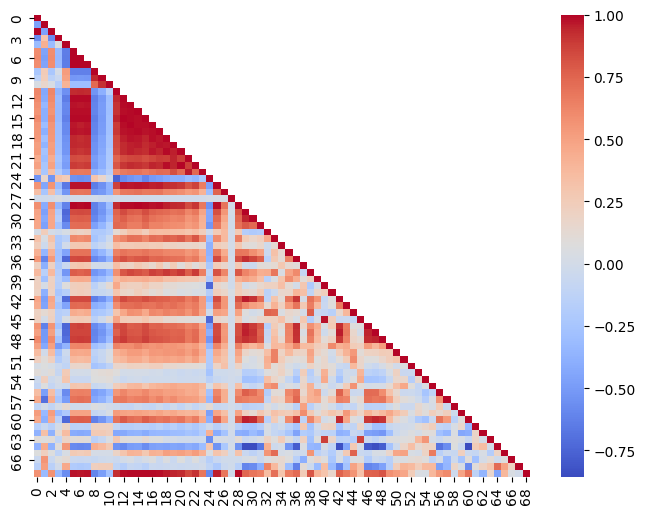

In [ ]:
''' Import the RDKit libraries for molecular descriptor calculation'''

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

''' Calculate the correlatin matrix and plot it'''

correlation_matrix = np.corrcoef(rdkit_descriptors_cleaned, rowvar=False)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', annot=False, cbar=True)

plt.show()

In [ ]:
''' Drop the columns with high correlation values'''

def remove_collinear_features(x, threshold):

    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            if val >= threshold:

                drop_cols.append(col.values[0])

    drops = set(drop_cols)
    x = x.drop(columns=drops)
    print('Removed Columns {}'.format(drops))
    return x

final_descriptors = remove_collinear_features(rdkit_descriptors_cleaned, 0.95)

Removed Columns {'LabuteASA', 'SlogP_VSA2', 'Chi4v', 'Chi1v', 'MolMR', 'Chi3n', 'Chi4n', 'Kappa1', 'SlogP_VSA6', 'Chi2v', 'MaxAbsEStateIndex', 'Chi2n', 'ExactMolWt', 'VSA_EState3', 'Chi1n', 'Chi0', 'Chi1', 'EState_VSA1', 'Chi0v', 'HeavyAtomMolWt', 'Chi0n'}


After cleaning the data deleting variables with a colineality using a threshold of 0.95, a total of 48 molecular descriptors remained. This is the final dataset that will be used for training and testing the Machine Learning algorithms.

In [ ]:
final_descriptors.head()

,MaxEStateIndex,MinEStateIndex,MinAbsEStateIndex,qed,MolWt,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BertzCT,Chi3v,...,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,MolLogP
0,8.236111,-0.337963,0.337963,0.433755,75.111,2.000000,2.200000,2.200000,20.854753,0.341112,...,0.000000,0.0,0.000000,4.921296,0.000000,0.0,-0.337963,2.013889,0.0,-0.6741
1,9.109120,-1.107963,0.016204,0.353173,164.157,1.272727,1.909091,2.454545,128.141050,1.730089,...,4.713657,0.0,0.000000,0.000000,0.000000,0.0,-4.114722,-0.407454,0.0,-2.1922
2,10.474306,-1.329306,0.344907,0.571526,130.143,1.555556,2.000000,2.111111,128.264663,1.270742,...,0.000000,0.0,20.424398,0.000000,-2.370972,0.0,0.588426,3.390833,0.0,0.6862
3,10.243056,-1.347222,0.395833,0.527564,116.116,1.375000,1.750000,1.750000,114.842190,0.735163,...,0.000000,0.0,20.034259,0.000000,-2.474537,0.0,0.000000,3.104074,0.0,0.2961
4,10.184398,-1.582176,0.425463,0.521625,146.098,1.000000,1.500000,1.800000,170.877124,0.804463,...,0.000000,0.0,29.734937,0.000000,-3.821065,0.0,-0.865278,0.000000,0.0,-0.4951


# 5. Exploring the molecular descriptors data using PCA

A PCA analysis of the data before training a Machine Learning algorithm can help understand the separability between the classes and offer an overview of how factible the data is to separate the target categories. If some separation is observed in the PCA this implies that the data is good enough for classification tasks.

As thje molecular descriptors adquire values that are in different scales, it is highly recommended to scale the data before in order to have a proper visualization and avoid the algorithm giving to much weight to some variables based just on the fact that they have values in a higher scale, which does not necessarly mean that they are more relevant.

In [ ]:
''' Import the RDKit libraries '''

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

''' Scale the data before doing the PCA. Use the final descriptors set'''

sc = StandardScaler()
scaler = StandardScaler()
scaler.fit(final_descriptors)
X_scaled = scaler.transform(final_descriptors)

''' Perform the PCA with the scaled dataset using three components'''

pca = PCA(n_components=3)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

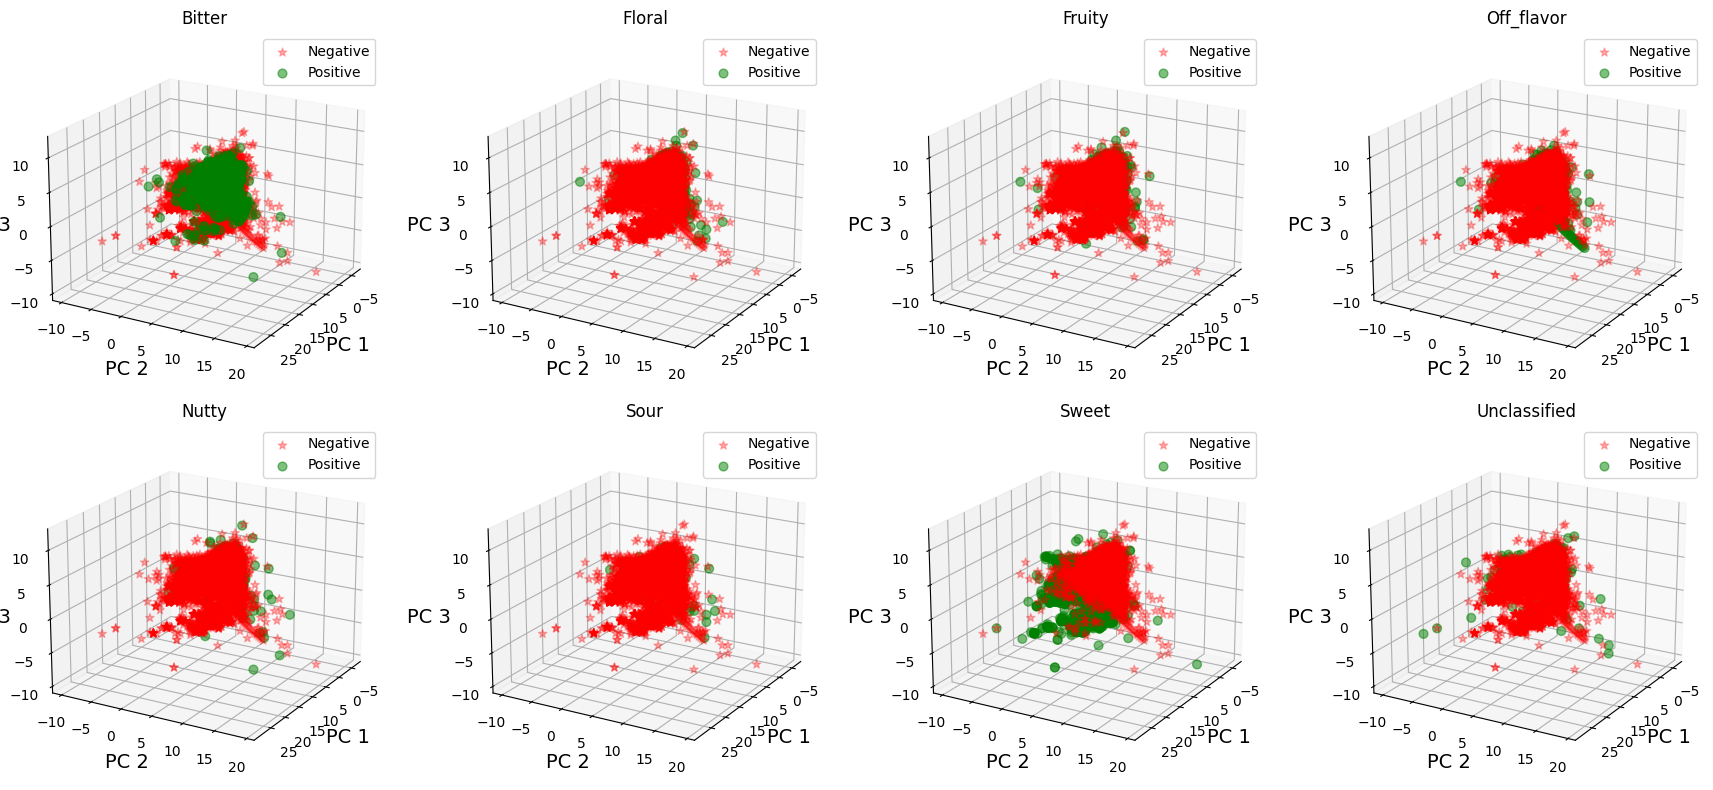

In [ ]:
''' Plot the PCA changing the label for each flavor category'''

cdict = {0:'red',1:'green'}
labl = {0:'Malignant',1:'Benign'}
marker = {0:'*',1:'o'}
alpha = {0:.3, 1:.5}

''' Obtain the labels from the original dataset'''

y_labels = data[['Bitter', 'Floral', 'Fruity', 'Off_flavor', 'Nutty', 'Sour', 'Sweet', 'Unclassified']]

''' Configure a three dimensional plot'''

fig, axes = plt.subplots(2, 4, figsize=(18, 8), subplot_kw={'projection': '3d'})

''' Loop over each category'''

for i, label in enumerate(y_labels):
    Xax = X_pca[:, 0]
    Yax = X_pca[:, 1]
    Zax = X_pca[:, 2]

    cdict = {0: 'red', 1: 'green'}
    labl = {0: 'Negative', 1: 'Positive'}
    marker = {0: '*', 1: 'o'}
    alpha = {0: 0.3, 1: 0.5}

    for l in np.unique(y_labels[label]):
        ix = np.where(y_labels[label] == l)
        axes.flat[i].scatter(Xax[ix], Yax[ix], Zax[ix], c=cdict[l], s=40, label=labl[l], marker=marker[l], alpha=alpha[l])

    axes.flat[i].set_xlabel("PC 1", fontsize=14)
    axes.flat[i].set_ylabel("PC 2", fontsize=14)
    axes.flat[i].set_zlabel("PC 3", fontsize=14)
    axes.flat[i].set_title(f'{label}')
    axes.flat[i].legend()
    axes.flat[i].view_init(elev=20, azim=30)

plt.tight_layout()
plt.show()

The PCA shows poor separation in most cases, which highlights the challenge ahead to produce good predictors for these notes. In the case of the unclassified category, this lack of separation was expected as it is a heteroginus group. For this reason, it is not a category used for direct prediction.

Another relevant aspect to consider with this analysis is the variance explained by the PCA

In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance_percentage = explained_variance * 100

print("Explained Variance of PCs:", explained_variance_percentage)

Explained Variance of PCs: [31.87915361 13.32194346  8.75311279]


The three ploted component together explain 50% of the variance in the data.

In [ ]:
''' Add the cleaned descriptor data to the original data'''

data_cleaned_rdkit_descriptors = pd.concat([data, final_descriptors], axis=1)

''' store the data in an excel file
Uncomment the code below to generate the excel file'''

data_cleaned_rdkit_descriptors.to_excel('RDKit_molecular_descriptors.xlsx', index=False)

# 6. Splitting the descriptor data for training and testing

In order to guarantee that the proportion of positive and negative data is conserved both in the training and testing set, the splitting of the data is performed separately for each flavor category. A ratio Training-Testing of 80:20 is used with a random state of 42 to assure some reproducibility. It should be noted that this is a random process.

In [ ]:
from sklearn.model_selection import train_test_split

''' Delete non useful columns'''

X_and_y_data = data_cleaned_rdkit_descriptors.drop(['Compound Name', 'pubChem ID ', 'flavor profile', 'Isomeric Smiles',
                                                    'Source', 'Labels', 'Unclassified'], axis=1)
''' split the data'''

RDKit_train, RDKit_test = train_test_split(X_and_y_data, test_size=0.2, random_state=42)

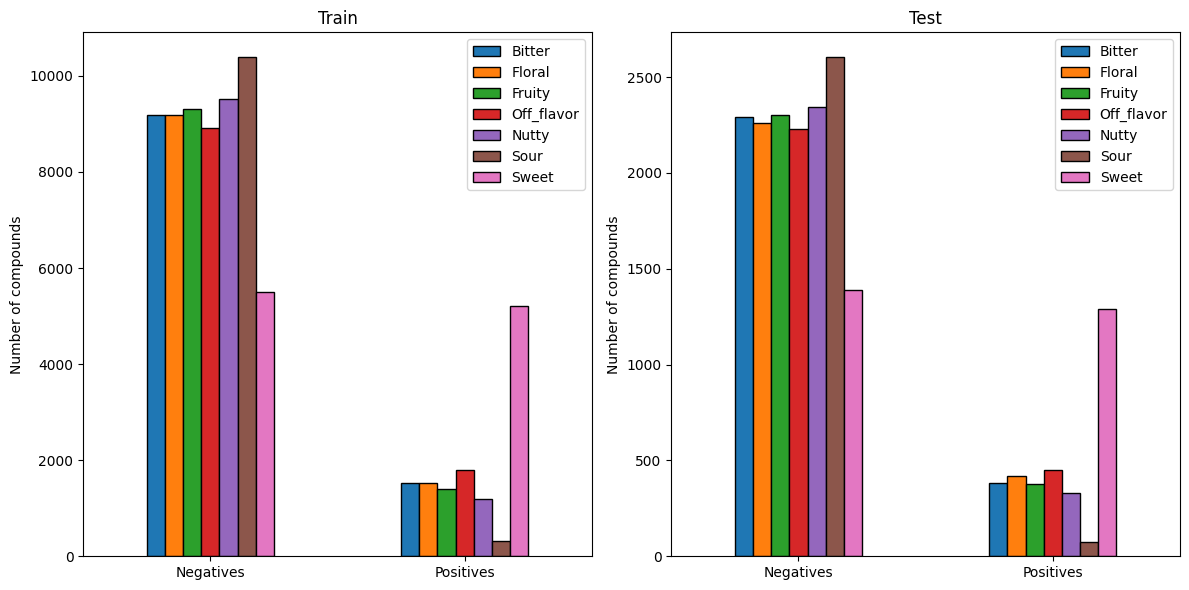

In [ ]:
data_to_plot_1 = RDKit_train[['Bitter', 'Floral', 'Fruity', 'Off_flavor', 'Nutty', 'Sour', 'Sweet']]
data_to_plot_1_counts = data_to_plot_1.apply(pd.value_counts)

data_to_plot_2 = RDKit_test[['Bitter', 'Floral', 'Fruity', 'Off_flavor', 'Nutty', 'Sour', 'Sweet']]
data_to_plot_2_counts = data_to_plot_2.apply(pd.value_counts)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

data_to_plot_1_counts.plot(kind='bar', edgecolor='black', ax=axes[0])
axes[0].set_title("Train")
axes[0].set_ylabel("Number of compounds")
x_labels = ['Negatives', 'Positives']
axes[0].set_xticklabels(x_labels, rotation=0)

data_to_plot_2_counts.plot(kind='bar', edgecolor='black', ax=axes[1])
axes[1].set_title("Test")
axes[1].set_ylabel("Number of compounds")
axes[1].set_xticklabels(x_labels, rotation=0)

plt.tight_layout()
plt.show()

In the above graph it can be seen that both the training and testing set have about the same compostion of positive and negative examples for all the target categories. This is important to guarantee and adequate evaluation of the models

In [ ]:
''' store the data in an excel file'''

RDKit_train.to_excel('RDKit_train.xlsx', index=False)

RDKit_test.to_excel('RDKit_test.xlsx', index=False)

# 7. Calculating the extended connectivity fingerprints for the whole dataset

The fingerprint was calculate with a radio of 2, meaning that the size of the fragments will be equal to 2 atoms of distance from central atom. This extended connectivity fingerprint is also calculated with RDKit. For more information about the extended connectivity fingerprint go to:
[https://doi.org/10.1021/ci100050t](https://)

In [ ]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit import Chem

''' Generate a molecule from each isomeric smiles'''

smiles = data ['Isomeric Smiles']
mols = [Chem.MolFromSmiles(i) for i in smiles]

[10:01:49] WARNING: not removing hydrogen atom without neighbors
[10:01:50] WARNING: not removing hydrogen atom without neighbors
[10:01:50] WARNING: not removing hydrogen atom without neighbors


In [ ]:
from rdkit.Chem import AllChem

''' Configure the extended connectivity fingerprint'''

radius=2
nBits=1024

''' Calculate the ECFP for each molecule'''

ECFP2 = [AllChem.GetMorganFingerprintAsBitVect(mol,radius=radius, nBits=nBits) for mol in mols]

The size selected for the fingerprint was 1024. Several literature reports show that this size has a better performance compared to 2048, which is the other available default option. Similarly, these reports show that a radio of to reduce the number of unique fingerprints, which is a desirable caracteristic, as it helps to improve the performance of tha trained models.

In [ ]:
''' Create a dataframe with the extended connectivity fingerprint'''

ecfp2_name = [f'Bit_{i}' for i in range(nBits)]
ecfp2_bits = [list(l) for l in ECFP2]
df_ecfp_2 = pd.DataFrame(ecfp2_bits, index = data.index, columns = ecfp2_name)
df_ecfp_2.head()
df_ecfp_2.to_excel('Complete_ECFP_data.xlsx')

# 8. Cleaninig the fingerprint data

Many of the fingerprint may have a high level of unique values, and threfore they must be deleted as they may cause overfitting problems. Those fingerprints with more 97% of unique values were deleted. This value was settled as the class with lower examples represents 3% (397) of the total dataset. Thus, any fingerprint with unique values above this threshold is highly likely to be non-informative.

In [ ]:
''' Find the molecular descriptors with more than 90% of unique values'''

fingerprint_to_drop = []

for column in df_ecfp_2.columns:

  total_fingerprints = df_ecfp_2[column].sum()

  if total_fingerprints < 397:

    fingerprint_to_drop.append(column)

  else:
    pass

print (len(fingerprint_to_drop))

print('Removed Columns {}'.format(fingerprint_to_drop))

758
Removed Columns ['Bit_0', 'Bit_3', 'Bit_5', 'Bit_6', 'Bit_7', 'Bit_8', 'Bit_12', 'Bit_14', 'Bit_16', 'Bit_17', 'Bit_18', 'Bit_19', 'Bit_20', 'Bit_21', 'Bit_23', 'Bit_24', 'Bit_25', 'Bit_26', 'Bit_27', 'Bit_28', 'Bit_29', 'Bit_30', 'Bit_32', 'Bit_34', 'Bit_35', 'Bit_37', 'Bit_38', 'Bit_39', 'Bit_41', 'Bit_43', 'Bit_44', 'Bit_45', 'Bit_47', 'Bit_48', 'Bit_49', 'Bit_50', 'Bit_51', 'Bit_52', 'Bit_55', 'Bit_56', 'Bit_57', 'Bit_58', 'Bit_59', 'Bit_60', 'Bit_61', 'Bit_62', 'Bit_63', 'Bit_65', 'Bit_66', 'Bit_67', 'Bit_68', 'Bit_69', 'Bit_70', 'Bit_72', 'Bit_74', 'Bit_76', 'Bit_77', 'Bit_78', 'Bit_81', 'Bit_82', 'Bit_83', 'Bit_84', 'Bit_85', 'Bit_87', 'Bit_88', 'Bit_89', 'Bit_91', 'Bit_92', 'Bit_93', 'Bit_95', 'Bit_96', 'Bit_97', 'Bit_98', 'Bit_99', 'Bit_100', 'Bit_101', 'Bit_103', 'Bit_105', 'Bit_106', 'Bit_107', 'Bit_108', 'Bit_109', 'Bit_110', 'Bit_111', 'Bit_113', 'Bit_115', 'Bit_120', 'Bit_122', 'Bit_123', 'Bit_125', 'Bit_126', 'Bit_127', 'Bit_129', 'Bit_131', 'Bit_132', 'Bit_134', 'Bi

In [ ]:
fingerprint_cleaned = df_ecfp_2[df_ecfp_2.columns.difference(fingerprint_to_drop)]

fingerprint_cleaned.head()

,Bit_1,Bit_10,Bit_1004,Bit_1009,Bit_1010,Bit_1017,Bit_1019,Bit_102,Bit_1020,Bit_104,...,Bit_953,Bit_960,Bit_962,Bit_964,Bit_965,Bit_967,Bit_980,Bit_981,Bit_992,Bit_998
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The final dataset contained 266 molecular fingerprints.

# 9. PCA analysis of the fingerprint data

After doing the cleaning of the molecular descriptors, a PCA analysis was run with the remaning descriptors. The PCA was run using three components.

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

f_pca = PCA(n_components=3)
f_pca.fit(fingerprint_cleaned)
fx_pca = f_pca.transform(fingerprint_cleaned)

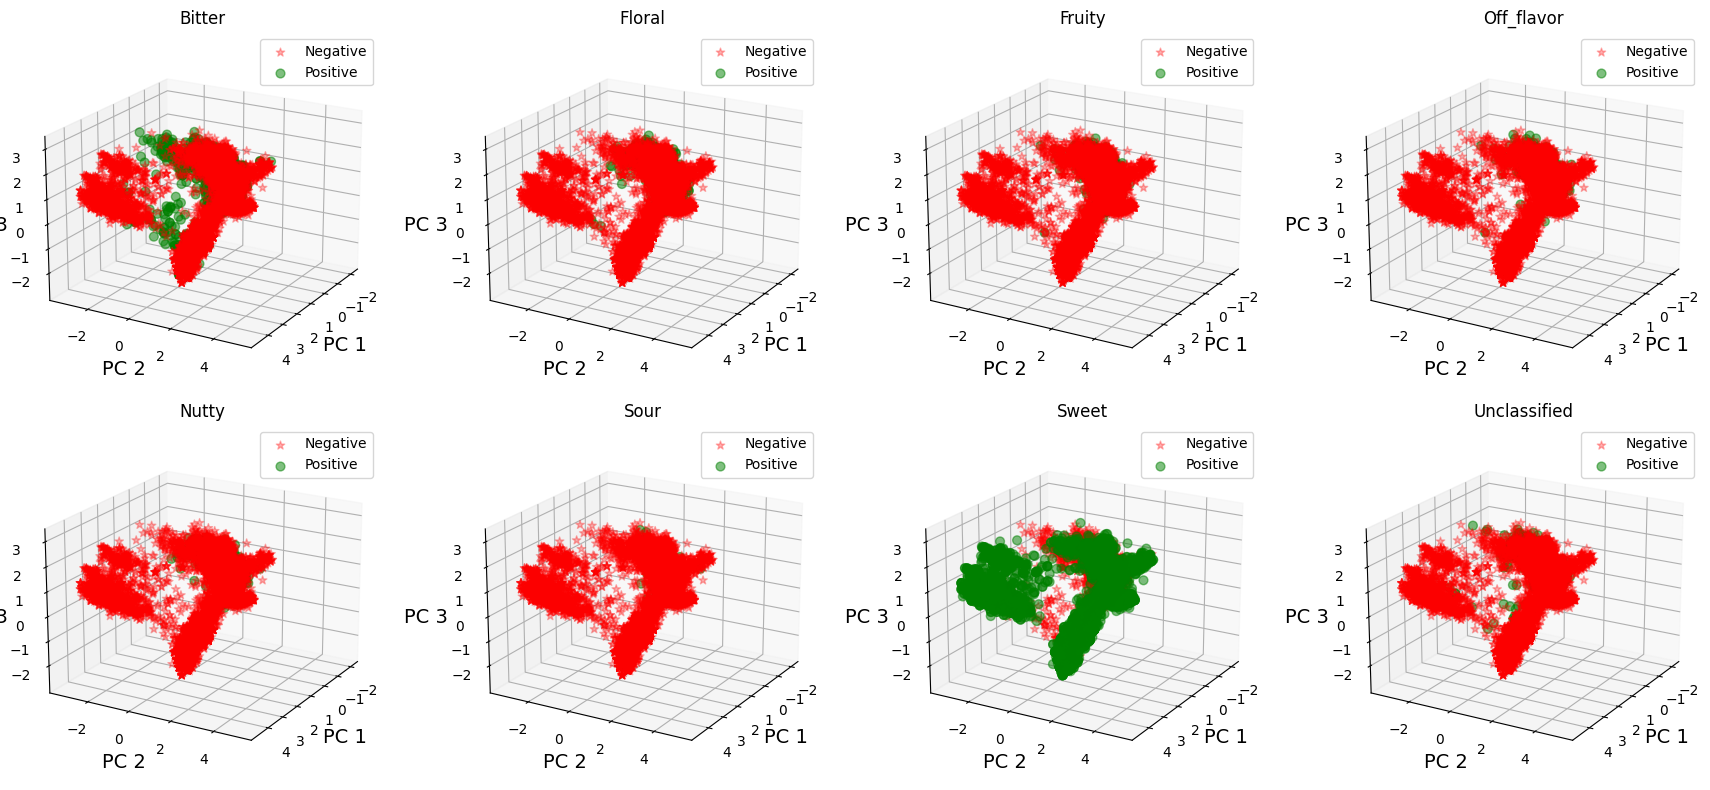

In [ ]:
''' Plot the PCA changing the label for each flavor category'''

cdict = {0:'red',1:'green'}
labl = {0:'Malignant',1:'Benign'}
marker = {0:'*',1:'o'}
alpha = {0:.3, 1:.5}

''' Obtain the labels from the original dataset'''

y_labels = data[['Bitter', 'Floral', 'Fruity', 'Off_flavor', 'Nutty', 'Sour', 'Sweet', 'Unclassified']]

''' Configure a three dimensional plot'''

fig, axes = plt.subplots(2, 4, figsize=(18, 8), subplot_kw={'projection': '3d'})

''' Loop over each category'''

for i, label in enumerate(y_labels):
    Xax = fx_pca[:, 0]
    Yax = fx_pca[:, 1]
    Zax = fx_pca[:, 2]

    cdict = {0: 'red', 1: 'green'}
    labl = {0: 'Negative', 1: 'Positive'}
    marker = {0: '*', 1: 'o'}
    alpha = {0: 0.3, 1: 0.5}

    for l in np.unique(y_labels[label]):
        ix = np.where(y_labels[label] == l)
        axes.flat[i].scatter(Xax[ix], Yax[ix], Zax[ix], c=cdict[l], s=40, label=labl[l], marker=marker[l], alpha=alpha[l])

    axes.flat[i].set_xlabel("PC 1", fontsize=14)
    axes.flat[i].set_ylabel("PC 2", fontsize=14)
    axes.flat[i].set_zlabel("PC 3", fontsize=14)
    axes.flat[i].set_title(f'{label}')
    axes.flat[i].legend()
    axes.flat[i].view_init(elev=20, azim=30)

plt.tight_layout()
plt.show()

The PCA of the fingeprint data shows a very poor separation for all the target flavor categories.

In [ ]:
''' Add the cleaned descriptor data to the original data'''

fingerprint_cleaned = pd.concat([data, fingerprint_cleaned], axis=1)

''' store the data in an excel file
Uncomment the code below to generate the excel file'''

fingerprint_cleaned.to_excel('Extended Connectivity Fingerprint.xlsx', index=False)

# 10. Splitting the fingerprint data for training and testing

In order to guarantee that the proportion of positive and negative data is conserved both in the training and testing set, the splitting of the data is performed separately for each flavor category. A ratio Training-Testing of 80:20 is used with a random state of 42 to assure some reproducibility. It should be noted that this is a random process.

In [ ]:
from sklearn.model_selection import train_test_split

''' Delete non useful columns'''

fingerprint = fingerprint_cleaned.drop(['Compound Name', 'pubChem ID ', 'flavor profile', 'Isomeric Smiles',
                                                    'Source', 'Labels', 'Unclassified'], axis=1)
''' split the data'''

ECFP_train, ECFP_test = train_test_split(fingerprint, test_size=0.2, random_state=42)

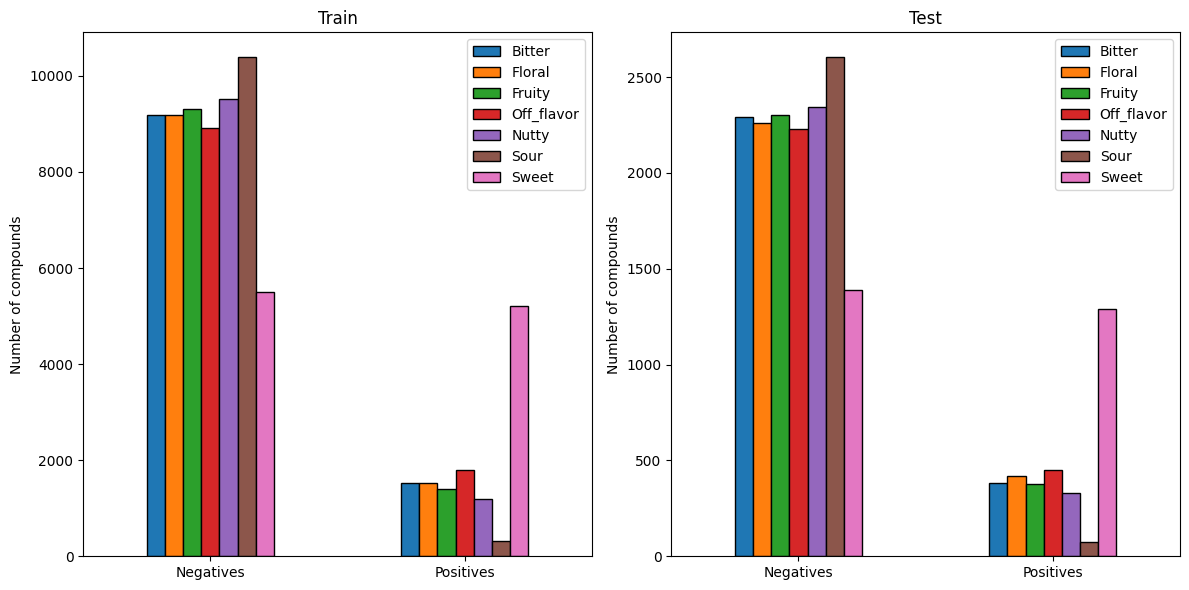

In [ ]:
data_to_plot_12 = ECFP_train[['Bitter', 'Floral', 'Fruity', 'Off_flavor', 'Nutty', 'Sour', 'Sweet']]
data_to_plot_12_counts = data_to_plot_12.apply(pd.value_counts)

data_to_plot_22 = ECFP_test[['Bitter', 'Floral', 'Fruity', 'Off_flavor', 'Nutty', 'Sour', 'Sweet']]
data_to_plot_22_counts = data_to_plot_22.apply(pd.value_counts)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

data_to_plot_12_counts.plot(kind='bar', edgecolor='black', ax=axes[0])
axes[0].set_title("Train")
axes[0].set_ylabel("Number of compounds")
x_labels = ['Negatives', 'Positives']
axes[0].set_xticklabels(x_labels, rotation=0)

data_to_plot_22_counts.plot(kind='bar', edgecolor='black', ax=axes[1])
axes[1].set_title("Test")
axes[1].set_ylabel("Number of compounds")
axes[1].set_xticklabels(x_labels, rotation=0)

plt.tight_layout()
plt.show()

Again, the distribution of labels after splitting the training and test data shows a similar composition in both sets.

These datasets are stored in separated excel files for the training and testing of the ML algorithms

In [ ]:
''' store the data in an excel file'''

ECFP_train.to_excel('ECFP_train.xlsx', index=False)

ECFP_test.to_excel('ECFP_test.xlsx', index=False)

# 11. Resampling strategies for class balance (Oversampling and undersampling)

The dataset used have a class imbalance, considering that the relation between positive and negative examples in the data is 15%. This means that a class balance strategy must be implemented. It is important to highlight that the class balance strategies were only implemented on the training set to avoid any manipulation of the test set that may affect the proper assesment of the performance of the final models.

The first strategy implemnted is SMOTE (Synthetic Minority Over-sampling TEchnique). This approach over-sample the minority class by creating sythetic examples based on the feature space rather than by random oversampling with replacement based on the data space. This process aims to provide more training examples for the minority class, making the training dataset balanced and reducing the bias towards the majority class. This process is repeated independently for each category as they show different imbalance levels. It was also repeated for RDKit molecular descriptors and Extended Connectivity Fingerprint

[https://www.jair.org/index.php/jair/article/view/10302/24590](https://)

In [ ]:
import pandas as pd

RDKit_train_data = pd.read_excel('/content/RDKit_train.xlsx')

X_RDKit_train = RDKit_train_data.drop(['Bitter', 'Floral', 'Fruity', 'Off_flavor', 'Nutty', 'Sour', 'Sweet'], axis=1)

y_RDKit_train = RDKit_train_data [['Bitter', 'Floral', 'Fruity', 'Off_flavor', 'Nutty', 'Sour', 'Sweet']]


In [ ]:
from imblearn.over_sampling import SMOTE

'''Perform oversampling for each label except '''

for label in y_RDKit_train:

  oversampler = SMOTE(sampling_strategy='auto', random_state=42)

  X_resampled, y_resampled = oversampler.fit_resample(X_RDKit_train, y_RDKit_train[label])

  ''' Store the resampled data in a new DataFrame and save it to a file'''

  resampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X_RDKit_train.columns),
                            pd.DataFrame(y_resampled, columns=[label])], axis=1)
  resampled_file_name = f'{label}_oversampled.xlsx'

  resampled_df.to_excel(resampled_file_name, index=False)

print("Oversampling and data separation complete.")

Oversampling and data separation complete.


In [ ]:
ECFP_train_data = pd.read_excel('/content/ECFP_train.xlsx')

X_ECFP_train = ECFP_train_data.drop(['Bitter', 'Floral', 'Fruity', 'Off_flavor', 'Nutty', 'Sour', 'Sweet'], axis=1)

y_ECFP_train = ECFP_train_data [['Bitter', 'Floral', 'Fruity', 'Off_flavor', 'Nutty', 'Sour', 'Sweet']]

In [ ]:
from imblearn.over_sampling import SMOTE

'''Perform oversampling for each label '''

for label in y_ECFP_train:

  oversampler = SMOTE(sampling_strategy='auto', random_state=42)

  X_resampled, y_resampled = oversampler.fit_resample(X_ECFP_train, y_ECFP_train[label])

  ''' Store the resampled data in a new DataFrame and save it to a file'''

  resampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X_ECFP_train.columns),
                            pd.DataFrame(y_resampled, columns=[label])], axis=1)
  resampled_file_name = f'{label}_ECFP_oversampled.xlsx'

  resampled_df.to_excel(resampled_file_name, index=False)

print("Oversampling and data separation complete.")

Oversampling and data separation complete.


The second class balance strategy implemented was oversampling using prototype generation with the cluster centroid method. Cluster Centroid Method for oversampling, creates synthetic samples that are representative of the minority class, mitigating the class imbalance problem while preserving the underlying data distribution. This method under samples the majority class by replacing a cluster of majority samples by the cluster centroid of a KMeans algorithm.

[https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.ClusterCentroids.html](https://)

In [ ]:
from imblearn.under_sampling import ClusterCentroids

for label in y_RDKit_train:

  cc = ClusterCentroids(random_state=42)

  X_resampled, y_resampled = cc.fit_resample(X_RDKit_train, y_RDKit_train[label])

  ''' Store the resampled data in a new DataFrame and save it to a file'''

  resampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X_RDKit_train.columns),
                            pd.DataFrame(y_resampled, columns=[label])], axis=1)
  resampled_file_name = f'{label}_undersampled.xlsx'

  resampled_df.to_excel(resampled_file_name, index=False)

print("Undersampling and data separation complete.")

In [ ]:
from imblearn.under_sampling import ClusterCentroids

for label in y_ECFP_train:

  cc = ClusterCentroids(random_state=42)

  X_resampled, y_resampled = cc.fit_resample(X_ECFP_train, y_ECFP_train[label])

  ''' Store the resampled data in a new DataFrame and save it to a file'''

  resampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X_ECFP_train.columns),
                            pd.DataFrame(y_resampled, columns=[label])], axis=1)
  resampled_file_name = f'{label}_ECFP_undersampled.xlsx'

  resampled_df.to_excel(resampled_file_name, index=False)

print("Undersampling and data separation complete.")

# 12. Generating the Molecular Graphs from the Isomeric Smiles

To generate the molecular graph the featurizer MolGraphConvFeaturizer ([https://doi.org/10.1007/s10822-016-9938-8](https://)). The molecules are represented as graphs where the atoms are nodes and the bonds edges. Also, 30 different features are stored in a vector for each atom. This graphs are build from the isomeric smiles of the compounds



In [ ]:
! pip install rdkit-pypi deepchem

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.2/693.2 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 28.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1


In [ ]:
import numpy as np
import deepchem as dc

In [ ]:
from rdkit import Chem

smiles_list = data ['Isomeric Smiles']

featurizer = dc.feat.MolGraphConvFeaturizer()
X = featurizer.featurize(smiles_list)

[09:01:36] WARNING: not removing hydrogen atom without neighbors
[09:02:53] WARNING: not removing hydrogen atom without neighbors
[09:02:53] WARNING: not removing hydrogen atom without neighbors


The molecular graphs were labeled with the respective binary flavor individually and stored as .joblib datasets. For hyperparameter optimization of the Graph Neural Network it is necessary to have a training, validation and test dataset. The training and validation test are merged to do the final training once the best hyperparameters have been found.

In [ ]:
from deepchem.splits import IndexSplitter
from google.colab import files

labels = ['Bitter', 'Floral', 'Fruity', 'Off_flavor', 'Nutty', 'Sour', 'Sweet']

for label in labels:

    dataset = dc.data.NumpyDataset(X, data[label])

    splitter = IndexSplitter()
    frac_train = 0.7
    frac_valid = 0.1
    frac_test = 0.2
    train_indices, valid_indices, test_indices = splitter.split(dataset, frac_train=frac_train, frac_valid=frac_valid, frac_test=frac_test)
    train_and_valid_indices = np.concatenate([train_indices, valid_indices])

    ''' Create the train, validation, and test datasets'''

    train_data = dataset.select(train_indices)
    valid_dataset = dataset.select(valid_indices)
    test_data = dataset.select(test_indices)
    train_and_valid_data = dataset.select(train_and_valid_indices)

    ''' Save the datasets as joblib files'''

    dc.utils.save_to_disk(train_data, f'train_data_{label}.joblib')
    files.download(f'train_data_{label}.joblib')

    dc.utils.save_to_disk(valid_dataset, f'valid_dataset_{label}.joblib')
    files.download(f'valid_dataset_{label}.joblib')

    dc.utils.save_to_disk(test_data, f'test_data_{label}.joblib')
    files.download(f'test_data_{label}.joblib')

    dc.utils.save_to_disk(train_and_valid_data, f'train_and_valid_data_{label}.joblib')
    files.download(f'train_and_valid_data_{label}.joblib')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In the case of Molecular Graphs is extremenly difficult to apply class balance tecniques such as SMOTE or cluster centroid. For this a Balancing tranformer from DeepChem was used. This transformer balances the sample weights so that the sum of all example weights from all classes is the same.

In [ ]:
for label in labels:

    dataset = dc.data.NumpyDataset(X, data[label])

    transformer = dc.trans.BalancingTransformer(dataset=dataset)
    dataset = transformer.transform(dataset)

    splitter = IndexSplitter()
    frac_train = 0.7
    frac_valid = 0.1
    frac_test = 0.2
    train_indices, valid_indices, test_indices = splitter.split(dataset, frac_train=frac_train, frac_valid=frac_valid, frac_test=frac_test)
    train_and_valid_indices = np.concatenate([train_indices, valid_indices])

    ''' Create the train, validation, and test datasets'''

    train_data = dataset.select(train_indices)
    valid_dataset = dataset.select(valid_indices)
    test_data = dataset.select(test_indices)
    train_and_valid_data = dataset.select(train_and_valid_indices)

    ''' Save the datasets as joblib files'''

    dc.utils.save_to_disk(train_data, f'balanced_train_data_{label}.joblib')
    files.download(f'balanced_train_data_{label}.joblib')

    dc.utils.save_to_disk(valid_dataset, f'balanced_valid_dataset_{label}.joblib')
    files.download(f'balanced_valid_dataset_{label}.joblib')

    dc.utils.save_to_disk(test_data, f'balanced_test_data_{label}.joblib')
    files.download(f'balanced_test_data_{label}.joblib')

    dc.utils.save_to_disk(train_and_valid_data, f'balanced_train_and_valid_data_{label}.joblib')
    files.download(f'balanced_train_and_valid_data_{label}.joblib')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>